# The Elements of Statistical Learning - Chapter 6 Exercises

## Exercise 6.1

Show that the Nadaraya–Watson kernel smooth with fixed metric bandwidth $\lambda$ and a Gaussian kernel is differentiable. What can be said for the Epanechnikov kernel? What can be said for the Epanechnikov kernel with adaptive nearest-neighbor bandwidth $\lambda(x_0)$?

### Solution

*Gaussian kernel*: Recall that the Nadaraya-Watson kernel smoother is

\begin{equation}
    \hat{f}(x_0) = \frac{\sum_{i=1}^N K_{\lambda}(x_0, x_i) y_i}{\sum_{i=1}^N K_{\lambda}(x_0, x_i)}
\end{equation}

and the Gaussian kernel is defined by

\begin{equation}
    K_{\lambda}(x_0, x_i) = \frac{1}{\sqrt{2\pi}\lambda} \text{exp}\left(-\frac{(x_0 - x_i)^2}{2\lambda^2}\right).
\end{equation}

Since the Gaussian kernel is differentiable and strictly positive and $\hat{f}(x_0)$ is a rational fuction in Gaussian kernels, it is also  differentiable everywhere.

*Epanechnikov kernel:* Now consider the Epanechnikov kernel

\begin{equation}
    K_{\lambda}(x_0, x_i) = D\left(\frac{\lvert x_0 - x_i\rvert}{\lambda}\right),
\end{equation}

where

\begin{equation}
    D(t) = 
    \begin{cases}
        \frac{3}{4}(1-t^2) & \text{if } \lvert t\rvert \leq 1 ;\\
        0 & \text{otherwise.}
    \end{cases}
\end{equation}

First note that $\hat{f}(x_0)$ is only well-defined for $x_0\in \bigcup_{i=1}^N (x_i-\lambda, x_i+\lambda)$. It is reasonable to assume this is an interval. We claim that $\hat{f}(x_0)$ is differentiable on this domain except possibly for $x_0 \in \{ x_i \pm \lambda \mid i=1,\ldots, N\}$.

The Epanechnikov kernel $K_{\lambda}(x_0, x_i)$ is positive on $(x_i-\lambda, x_i+\lambda)$ and is differentiable everywhere except $x_0 = x_i\pm \lambda$ since

\begin{equation}
    D^{\prime}(t) = 
    \begin{cases}
        -\frac{3}{2} t & \text{if } \lvert t\rvert < 1 ;\\
        0 & \text{otherwise.}
    \end{cases}
\end{equation}

Thus $\hat{f}(x_0)$ is differentiable on its domain except for possibly at these points. Indeed, the quotient rule implies that

\begin{align}
    \hat{f}^{\prime}(x_0)
        & = \frac{\left(\sum_{i=1}^N K_{\lambda}^{\prime}(x_0, x_i)y_i\right)\left(\sum_{j=1}^N K_{\lambda}(x_0, x_j)\right) - \left(\sum_{j=1}^N K_{\lambda}(x_0, x_j)y_j\right)\left(\sum_{i=1}^N K^{\prime}_{\lambda}(x_0, x_i)\right)}{\left(\sum_{i=1}^N K_{\lambda}(x_0, x_i)y_i\right)^2} \\
        & = \frac{\sum_{i=1}^N\sum_{j=1}^N K_{\lambda}^{\prime}(x_0, x_i) K_{\lambda}(x_0, x_j)(y_i - y_j)}{\left(\sum_{i=1}^N K_{\lambda}(x_0, x_i)y_i\right)^2}
\end{align}

and so if $x_0=x_i - \lambda$ then the difference $\hat{f}^{\prime}(x_0-\varepsilon)- \hat{f}^{\prime}(x_0+\varepsilon)$  converges to

\begin{equation}
    \frac{\sum_{j=1}^N \frac{3}{2}K_{\lambda}(x_0, x_j)(y_i - y_j)}{\left(\sum_{j=1}^N K_{\lambda}(x_0, x_j)y_j\right)^2}
\end{equation}

as $\varepsilon \to 0$. This is clearly non-zero in general.

*Nearest-neighbour bandwidth:* Redefine the kernel by

\begin{equation}
    K_{\lambda}(x_0, x_i)=D\left( \frac{\lvert x_0 - x_i\rvert}{\lvert x_0 - x_{[k]}\rvert}\right)
\end{equation}

with $D$ as before. For simplicity we assume that the $x_i$ are all distinct. The situation where they are not is discussed in the text.

For $k=1$, $K_{\lambda}(x_0, x_i) = 0$ for all $x_0, x_i$

For $k=2$, $K_{\lambda}(x_0, x_i) = 0$ unless $x_i = x_{[1]}$ and so $\hat{f}(x_0) = y_{[1]}$. Thus $\hat{f}$ is piecewise constant with (possible) discontinuities where $x_{[2]}$ changes.

Suppose $k>2$. The function $\lvert x_0 - x_i\rvert\big/\lvert x_0 - x_{[k]}\rvert$ is continuous in $x_0$ and differentiable except where $x_{[k]}$ changes. Moreover, for any given $x_0$, at least one $K_{\lambda}(x_0, x_i)$ is positive, so the denominator of $\hat{f}$ is always non-zero. Thus $\hat{f}$ is continuous and differentiable except possibly where $x_{[k]}$ changes. We show that non-differentiability is possible by example below.

In [213]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt

In [214]:
# Define Epanechnikov kernel function
def epan_kernel(x0, x1, band):
    if np.abs(x0 - x1) > band:
        return 0
    else:
        return 3 * (1 - (x0 - x1)**2 / band**2) / 4

First we demonstrate that when using the Epanechnikov kernel with a fixed bandwidth, $\hat{f}(x_0)$ can be non-differentiable at $x_0=x_i\pm \lambda$.

/Users/christopherleonard/P/elements-of-statistical-learning/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


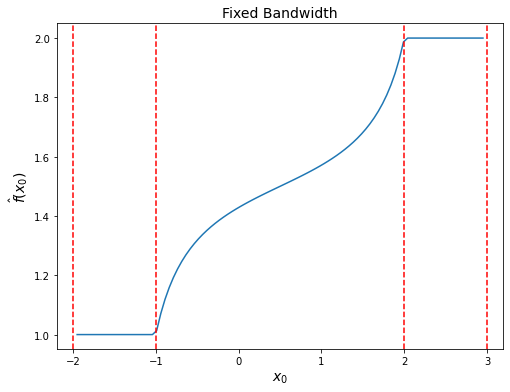

In [236]:
# Bandwidth parameter
band = 2

# Sample data
x1 = 0
x2 = 1

y1 = 1
y2 = 2

# Define Nadaraya-Watson smoother function f_hat
def NW_smoother(x0):
    f = epan_kernel(x0, x1, window) * y1 + epan_kernel(x0, x2, window) * y2
    f = f / (epan_kernel(x0, x1, window) + epan_kernel(x0, x2, window))
    
    return f
    
# Initialise plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Fixed Bandwidth', fontsize=14)
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$\hat{f}(x_0)$', fontsize=14)

# Generate and plot data
x_val = np.linspace(x1-band, x2+band, 100)
f = np.array([NW_smoother(x0) for x0 in x_val])

ax.plot(x_val, f)

# Plot possible points on non-differentiability
for xi in [x1, x2]:
    for sign in [1, -1]:
        ax.axvline(xi + sign * band, color='r', ls='--');

Now we show that $\hat{f}(x_0)$ can be discontinuous or non-differentiable when we use a nearest-neighbour window.

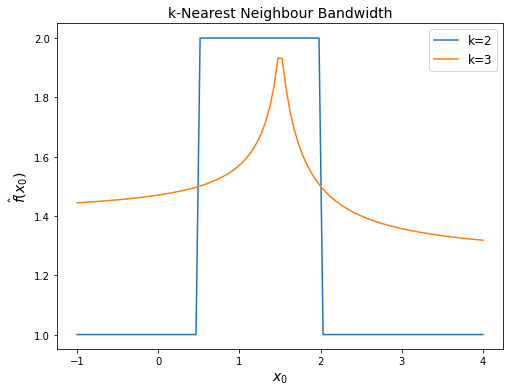

In [261]:
# Sample data
x1 = 0
x2 = 1
x3 = 3

y1 = 1
y2 = 2
y3 = 1

# NW smoother function
def NW_smoother(x0, k):
    # Set bandwidth
    dist = [np.abs(x0 - x1), np.abs(x0 - x2), np.abs(x0 - x3)]
    band = sorted(dist)[k-1]
    
    # Calculate f as before
    f = epan_kernel(x0, x1, band) * y1 + epan_kernel(x0, x2, band) * y2 + epan_kernel(x0, x3, band) * y3
    f = f / (epan_kernel(x0, x1,  band) + epan_kernel(x0, x2, band) + epan_kernel(x0, x3, band))
    
    return f

# Initialise plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('k-Nearest Neighbour Bandwidth', fontsize=14)
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$\hat{f}(x_0)$', fontsize=14)

# Generate and plot data
for k in [2, 3]:
    x_val = np.linspace(-1, 4, 100)
    f = np.array([NW_smoother(x0, k) for x0 in x_val])

    ax.plot(x_val, f, label='k={}'.format(k))

ax.legend(fontsize=12);

Note that with $k=2$, $\hat{f}(x_0)$ is discontinuous at $x=0.5, 2$ where the 2nd closest point changes, and  for $k=3$ it is non-differentiable at $x=1.5$ where the 3rd closest point changes from $x_3$ to $x_1$.

## Exercise 6.2

Show that $\sum_{i=1}^N (x_i −x_0)l_i(x_0) = 0$ for local linear regression. Define $b_j(x_0) = \sum_{i=1}^N (x_i − x_0)^j l_i(x_0)$. Show that $b_0(x_0) = 1$ for local polynomial regression of any degree (including local constants). Show that $b_j(x_0) = 0$ for all $j \in\{1, 2, . . . , k\}$ for local polynomial regression of degree $k$. What are the implications of this on the bias?

### Solution

The first part is a special case of the second so we'll skip it.

Consider local polynomial regression of degree $k\geq 0$. Recall that the $l_i(x_0)$ are defined such that $\hat{f}(x_0) = \sum_{i=1}^N l_i(x_0)y_i$ is the solution to the weighted polynomial regression problem

\begin{equation}
    \underset{\alpha(x_0), \beta_j(x_0)}{\text{min}} \sum_{i=1}^N K_{\lambda}(x_0, x_i)\left[y_i - \alpha(x_0) - \sum_{j=1}^d \beta_j(x_0)x_i^j\right]^2
\end{equation}

evaluated at $x_0$. Thus $b_j(x_0)$ is the solution to this problem with $y_i = (x_i - x_0)^j$ for all $i$. For $j\leq k$ we can interpolate these values perfectly with the polynomial $p_j(x) = (x - x_0)^j$ and so 

\begin{equation}
    b_j(x_0) = p_j(x_0) = 
        \begin{cases}
            1 & \text{if } j=0, \\
            0 & \text{if } 1\leq j\leq k.
        \end{cases}
\end{equation}

Consider the Taylor series for the regression function $f(x)$ centred at $x_0$ (assuming suitable differentiability etc):

\begin{equation}
    f(x) = \sum_{j=0}^k \frac{f^{(j)}(x_0)}{j!}(x-x_0)^j + h_k(x)(x - x_0)^{k+1},
\end{equation}

where $h_k(x)\to 0$ as $x\to x_0$. We have

\begin{align}
    \text{E}\left(\hat{f}(x_0)\right)
        & = \text{E}\left(\sum_{i=1}^N l_i(x_0)y_i\right) \\
        & = \sum_{i=1}^N l_i(x_0)f(x_i) \\
        & = \sum_{i=1}^N \left[l_i(x_0) \left(\sum_{j=0}^k\frac{f^{(j)}(x_0)}{j!} (x_i - x_0)^j\right) + l_i(x_0)h_k(x_i)(x_i-x_0)^{k+1}\right] \\
        & = \sum_{j=0}^k \left(\frac{f^{(j)}(x_0)}{j!} b_j(x_0)\right) + \sum_{i=1}^N h_k(x_i)b_{k+1}(x_0) \\
        & = f(x_0) + \sum_{i=1}^N h_k(x_i)b_{k+1}(x_0).
\end{align}

So the bias $\text{E}\left(\hat{f}(x_0)\right) - f(x_0)$ only depends on terms of order greater than $k$.

## Exercise 6.3

Show that $\lVert l(x)\rVert$ (Section 6.1.2) increases with the degree of the local polynomial.

### Solution

We will instead show that $\lVert\mathbf{W}(x)^{-\frac{1}{2}} l(x)\rVert^2 = l(x)^T \mathbf{W}(x)^{-1} l(x)$ increases with $d$. I believe this is the correct formulation.

Take $d\in\mathbf{N}$, let $p_d(x)=(1, x, x^2, \ldots , x^d)^T$, and let $\mathbf{P}_d$ denote the matrix whose $i$th row is $p_d(x_i)$. We will write $l_d(x)=l(x)$ to emphasise the dependence on the degree. Recall that $l_d(x)$ arises  from minimising $\text{RSS}_d(\beta)$ over $\beta$, where

\begin{equation}
    \text{RSS}_d(\beta) = (\mathbf{y} - \mathbf{P}_d\beta)^T  \mathbf{W}(\mathbf{y} - \mathbf{P}_d\beta)
\end{equation}

This has solution

\begin{equation}
    \hat{\beta} = \big(\mathbf{P}_d^T\mathbf{W}(x)\mathbf{P}_d\big)^{-1} \mathbf{P}_d^T \mathbf{W}(x)\mathbf{y}
\end{equation}

and $l_d(x)$ is defined by

\begin{equation}
    l_d(x) = \mathbf{W}(x)\mathbf{P}_d \big(\mathbf{P}_d^T\mathbf{W}(x)\mathbf{P}_d\big)^{-1}p_d(x)
\end{equation}

so that $\hat{f}(x) = l_d(x)^T\mathbf{y}$.

We begin by making a change of variables: let $\mathbf{y}^* = \mathbf{W}(x)^{\frac{1}{2}}\mathbf{y}$, $\mathbf{P}_d^* =\mathbf{W}(x)^{\frac{1}{2}}\mathbf{P}_d$, and 

\begin{equation}
    l_d^*(x) = \mathbf{W}^{-\frac{1}{2}}l_d(x) = \mathbf{P}^*_d \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1}p_d(x)
\end{equation}

This allows us to rewrite $\text{RSS}_d(\beta) = \lVert \mathbf{y}^*  - \mathbf{P}_d^*\beta\rVert^2$. Since the least-squares solution is given by orthogonal projection of $\mathbf{y}$, we have

\begin{equation}
    \text{RSS}_d(\hat{\beta}) = \lVert \mathbf{y}^*\rVert^2  - \lVert\mathbf{P}_d^*\hat{\beta}\rVert^2.
\end{equation}

Take $\mathbf{y}^*=l_{d+1}^*(x)$. Then

\begin{equation}
    \hat{\beta}
         = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} \mathbf{P}_d^{*T}\mathbf{y}^*
         = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} \mathbf{P}_d^{*T}\mathbf{P}_{d+1}^* \big(\mathbf{P}_{d+1}^{*T}\mathbf{P}_{d+1}^*\big)^{-1}p_{d+1}(x).
\end{equation}

Let $\mathbf{I}_{m,n}$ denote the $m\times n$ identity matrix. Then $\mathbf{P}^*_d=\mathbf{P}_{d+1}^*\mathbf{I}_{d+2,  d+1}$, so

\begin{align}
    \hat{\beta} 
        & = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} \mathbf{I}_{d+1, d+2}\mathbf{P}_{d+1}^{*T}\mathbf{P}_{d+1}^* \big(\mathbf{P}_{d+1}^{*T}\mathbf{P}_{d+1}^*\big)^{-1}p_{d+1}(x) \\
        & = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} \mathbf{I}_{d+1, d+2}p_{d+1}(x) \\
        & = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} p_{d}(x) \\
        & = \big(\mathbf{P}_d^{*T}\mathbf{P}_d^*\big)^{-1} p_{d}(x).
\end{align}

This implies that

\begin{equation}
    \text{RSS}_d(\hat{\beta}) = \lVert l_{d+1}^*(x)\rVert^2  - \lVert l_d^*(x)\rVert^2\geq 0
\end{equation}

so $\lVert l_{d+1}^*(x)\rVert  \geq \lVert l^*_d(x)\rVert$ as claimed.

## Exercise 6.4

Suppose that the $p$ predictors $X$ arise from sampling relatively smooth analog curves at $p$ uniformly spaced abscissa values. Denote by $\text{Cov}(X\mid Y) = \mathbf{\Sigma}$ the conditional covariance matrix of the predictors, and assume this does not change much with $Y$. Discuss the nature of Mahalanobis choice $\mathbf{A} = \mathbf{\Sigma}^{−1}$ for the metric in (6.14). How does this compare with $\mathbf{A} = \mathbf{I}$? How might you construct a kernel $\mathbf{A}$ that (a) downweights high-frequency components in the distance metric; (b) ignores them completely?

### Solution

*I don't think that I really answered the question here.*

I am a little unclear what this problem is looking for. The Mahalanovis distance weights the kernel according to the spread of data in that direction; if the spread in a particular direction is broad then the window will be wider in that direction. This is equivalent to sphering the data and then using $\mathbf{A}=\mathbf{I}$. Using the identity matrix on its own makes no such adjustment.

Assuming that the $x_i$ are measuring amplitude at different (increasing) frequencies, we can downweight high frequency components by taking a diagonal matrix $\mathbf{A}=\text{diag}(a_1,\ldots a_p)$ with $a_j$ is small for $j$ large. We can ignore them completely by taking $a_j=0$ for $j$ large.

## Exercise 6.5

Show that fitting a locally constant multinomial logit model of the form (6.19) amounts to smoothing the binary response indicators for each class separately using a Nadaraya–Watson kernel smoother with kernel weights $K_{\lambda}(x_0, x_i)$.

### Solution

A locally constant multinomial logit model have the form

\begin{equation}
    \ln\left(\frac{\text{P}(G=j \mid X=x_0)}{\text{P}(G=J \mid X=x_0)}\right)
        = \beta_{j0}(x_0).
\end{equation}

We can rewrite this as

\begin{equation}
    \text{P}(G=j \mid X=x_0) = \alpha_j(x_0)
\end{equation}

for suitable constants $\alpha_j$ with $\sum_{j=1}^J \alpha_j=1$. We wish to maximise the local log-likelihood:

\begin{equation}
    l(\alpha) = \sum_{j=1}^J \left(\sum_{g_i=j} K_{\lambda}(x_0, x_i)\right) \ln(\alpha_j(x_0)).
\end{equation}

Consider the Lagrangian function

\begin{equation}
    \mathcal{L}(\alpha, \mu)
        = \sum_{j=1}^J \left(\sum_{g_i=j} K_{\lambda}(x_0, x_i)\right) \ln(\alpha_j(x_0))
             - \mu\left(\sum_{j=1}^J \alpha_j - 1\right).
\end{equation}

This has partial derivatives

\begin{equation}
    \frac{\partial\mathcal{L}}{\partial \alpha_j}
        = \frac{1}{\alpha_j}\left(\sum_{g_i=j} K_{\lambda}(x_0, x_i)\right) - \mu.
\end{equation}

Setting these to zero gives

\begin{align}
    \mu \alpha_j
        & = \sum_{g_i=j} K_{\lambda}(x_0, x_i)\\
    \Rightarrow \left(\sum_{j=1}^J \alpha_j\right)\mu
        & = \sum_{i=1}^N K_{\lambda}(x_0, x_i)\\
    \Rightarrow \alpha_j
        & = \frac{\sum_{g_i=j} K_{\lambda}(x_0, x_i)}{\sum_{i=1}^N K_{\lambda}(x_0, x_i)}.
\end{align}

We claim this gives a maximum of the local log-likelihood $l(\alpha)$ with respect to the restriction $\sum_j \alpha_j=1$. Indeed, the domain of $\ln$ is $(0, \infty)$ so the domain of $l(\alpha)$ is contained in $(0, 1)^{J}$ when under the restriction $\sum_j \alpha_j=1$. Since $\ln(\alpha_j)\to -\infty$ as $\alpha_j\to 0$ we may restrict ourselves to $[\varepsilon, 1-\varepsilon]^J$ for some small $\varepsilon$. There must be a maximum in the interior of this compact set and so the solution above must be it.

Thus maximising log-likehood yields the model

\begin{equation}
    \text{P}(G=j \mid X=x_0) = \frac{\sum_{g_i=j} K_{\lambda}(x_0, x_i)}{\sum_{i=1}^N K_{\lambda}(x_0, x_i)}.
\end{equation}

But this is the same as smoothing binary response variable: if $y_{ij}=1$ if $g_i=j$ and is zero otherwise then the Nadaraya-Watson kernel smoother gives

\begin{equation}
    \frac{\sum_{i=1}^N K_{\lambda}(x_0, x_i)y_{ij}}{\sum_{i=1}^N K_{\lambda}(x_0, x_i)},
\end{equation}

which equals the expression above.

## Exercise 6.7

Derive an expression for the leave-one-out cross-validated residual sum-of-squares for local polynomial regression.

### Solution

The solution is very similar to Exercise 5.13.

Let $\hat{f}^{(-i)}$ denote the estimate for the regression function with the data point $(x_i, y_i)$ removed. At $x_i$ this is determined by the following least-squares problem:

\begin{equation}
    \underset{\alpha, \beta_k}{\text{min}}\sum_{j\neq i}K_{\lambda}(x_i,x_j)\left[y_j-\alpha-\sum_{k=1}^d\beta_k x_j^k\right]^2.
\end{equation}

The solution to this problem doesn't change if we augment the data with $(x_i, \hat{f}^{(-i)}(x_i))$ so we may assume that this is our data set. Let $\mathbf{y}^{(-i)}$ denote the corresponding output vector, so $\mathbf{y}^{(-i)}-\mathbf{y} = (\hat{f}^{(-i)}_{\lambda}(x_i) - y_i)\mathbf{e}_i$, where $\mathbf{e}_i$ is a standard basis vector.

Let $\mathbf{S}_{\lambda}$ denote the smoother matrix for the local polynomial regression problem with $(i, j)$ entry $l_i(x_j)$. Recall that $\mathbf{S}_{\lambda}$ is independent of $\mathbf{y}$ so is the same for each $\hat{f}^{(-i)}$ (since we have augmented the data set with $x_i$). Thus $\hat{f}^{(-i)}(x_i)$ equals the $i$th entry of 

\begin{equation}\
    \mathbf{S}_{\lambda}\mathbf{y}^{(-i)} = \mathbf{S}_{\lambda}\mathbf{y} + \mathbf{S}_{\lambda}(\hat{f}^{(-i)}(x_i) - y_i)\mathbf{e}_i.
\end{equation}

That is,

\begin{equation}
    \hat{f}^{(-i)}(x_i) = \hat{f}(x_i) + l_i(x_j)(\hat{f}^{(-i)}(x_i) - y_i).
\end{equation}

This implies that 

\begin{equation}
    y_i - \hat{f}^{(-i)}(x_i) = y_i - \hat{f}(x_i) + l_i(x_j)(y_i - \hat{f}^{(-i)}(x_i)) \\
    \Rightarrow y_i - \hat{f}^{(-i)}(x_i) = \frac{y_i - \hat{f}(x_i)}{1-l_i(x_i)}.
\end{equation}

Therefore the leave-on-out cross-validation error is

\begin{align}
    \text{CV}(\hat{f}) 
        & = \frac{1}{N} \sum_{i=1}^N \left( y_i - \hat{f}^{(-i)}(x_i)\right)^2 \\
        & = \frac{1}{N} \sum_{i=1}^N \left( \frac{y_i - \hat{f}(x_i)}{1-l_i(x_i)}\right)^2.
\end{align}

## Exercise 6.10

Suppose we have $N$ samples generated from the model $y_i = f(x_i)+ \varepsilon_i$, with $\varepsilon_i$ independent and identically distributed with mean zero and variance $\sigma^2$, the $x_i$ assumed fixed (non random). We estimate $f$ using a linear smoother (local regression, smoothing spline, etc.) with smoothing parameter $\lambda$. Thus the vector of fitted values is given by $\hat{\mathbf{f}}=\mathbf{S}_{\lambda}\mathbf{y}$. Consider the in-sample prediction error

\begin{equation}
    \text{PE}(\lambda) = \text{E}\left(\frac{1}{N}\sum_{i=1}^N(y_i^* - \hat{f}_{\lambda}(x_i))^2\right)
\end{equation}

for predicting new responses at the $N$ input values. Show that the average squared residual on the training data, 
$\text{ASR}(\lambda)$, is a biased estimate (optimistic) for $\text{PE}(\lambda)$, while

\begin{equation}
    C_{\lambda}= \text{ASR}(\lambda)+\frac{2\sigma^2}{N}\text{trace}(\mathbf{S}_{\lambda})
\end{equation}

is unbiased.

### Solution

I assume that the $y_i^*$ denote new observations at the $x_i$.

We can expand

\begin{align}
    \text{PE}(\lambda)
        & = \text{E}\left(\frac{1}{N}(\mathbf{y}^*-\hat{\mathbf{f}})^T (\mathbf{y}^*-\hat{\mathbf{f}})\right) \\
        & = \frac{1}{N} \left(\text{E}(\lVert\mathbf{y}^*\rVert^2) - 2\text{E}(\mathbf{y}^{*T}\hat{\mathbf{f}}) + \text{E}(\lVert\hat{\mathbf{f}}\rVert^2)\right)
\end{align}

and

\begin{equation}
    \text{E}(\mathbf{y}^{*T}\hat{\mathbf{f}})
        = \text{E}(\mathbf{y}^{*})^T\text{E}(\hat{\mathbf{f}})
        = \text{E}(\mathbf{y}^{*})^T \mathbf{S}_{\lambda}\text{E}(\mathbf{y})
        = \mathbf{f}^T\mathbf{S}_{\lambda}\mathbf{f}.
\end{equation}

Similarly, 

\begin{align}
    \text{E}(\text{ASR}(\lambda))
        & = \text{E}\left( \frac{1}{N}(\mathbf{y}-\hat{\mathbf{f}})^T (\mathbf{y}-\hat{\mathbf{f}})\right) \\
        & = \frac{1}{N} \left(\text{E}(\lVert\mathbf{y}\rVert^2) - 2\text{E}(\mathbf{y}^{T}\hat{\mathbf{f}}) + \text{E}(\lVert\hat{\mathbf{f}}\rVert^2)\right)
\end{align}

and

\begin{align}
    \text{E}(\mathbf{y}^{T}\hat{\mathbf{f}})
        & = \text{E}(\mathbf{y}^{T}\mathbf{S}_{\lambda}\mathbf{y}) \\
        & = \sum_{i=1}^N\sum_{j=1}^N \text{E}\left(y_i(\mathbf{S}_{\lambda})_{i,j}y_j\right) \\
        & = \sum_{i=1}^N\sum_{j=1}^N \text{E}(y_i)\text{E}\left((\mathbf{S}_{\lambda})_{i,j}\right)\text{E}(y_j)
            + \sum_{i=1}^N (\mathbf{S}_{\lambda})_{i,i} \text{Var}(y_i) \\
        & = \mathbf{f}^T\mathbf{S}_{\lambda}\mathbf{f} + \sigma^2 \text{trace}(\mathbf{S}_{\lambda}).
\end{align}

So, since $\text{E}(\lVert\mathbf{y}^*\rVert^2) = \text{E}(\lVert\mathbf{y}\rVert^2)$, 

\begin{equation}
    \text{Bias}(\text{ASR}(\lambda))
         = \text{E}(\text{ASR}(\lambda)) - \text{PE}(\lambda)
        = -\frac{-2\sigma^2}{N}\text{trace}(\mathbf{S}_{\lambda}).
\end{equation}

Therefore $\text{ASR}(\lambda)$ is a optimistically biased for $\text{PE}(\lambda)$ (it underestimates the error) and $C_{\lambda}$ is an unbiased estimator for $\text{PE}(\lambda)$.